# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

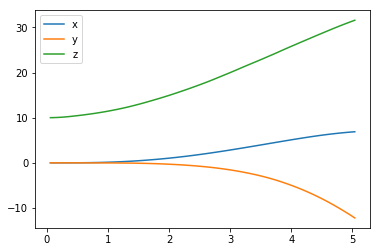

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

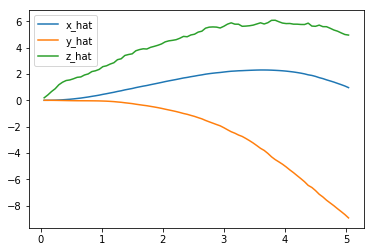

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

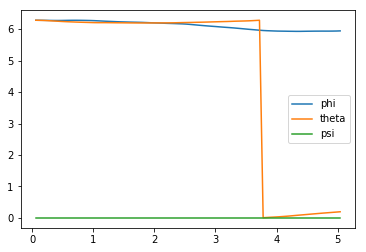

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

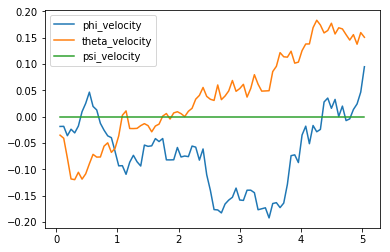

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

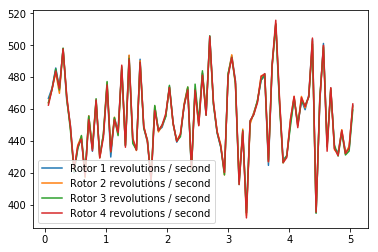

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  6.88424781 -12.20482991  31.58985717   5.94465553   0.19539253
   0.        ]
[ 0.96292271 -8.93381089  4.95358402]
[0.09496019 0.15087781 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [386]:
from task import *

if False:
    target_pos = np.array([0., 0., 10.])
    task = Task(target_pos=target_pos)
else:
    task = HoverTask(max_velocity=0.5)  # max_velocity (make it easier to hover with some movement)
    # task = LandingTask()  # init_movement=3 (make it harder with some initial movement)

In [281]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent

num_episodes = 1000
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action, _ = agent.act(state) 
        next_state, reward, done = task.step(action)
        state_check = task.state()
        agent.step(reward, done, action, state, next_state)
        state = next_state
        if done:
            print("\rTask = {:2d}, Episode = {:4d}, score = {:7.3f}, error = {:3.2f}, " \
                  "(best = {:7.3f}), best_state = {}, position = {:}, action = {:} {:10s}".format(
                    i_task, i_episode, agent.score, agent.error, 
                    agent.best_score, agent.best_state, 
                    state_check['position'], action, 
                    ""), end="")  # [debug]
            break
    sys.stdout.flush()

Task =  1, Episode = 1000, score = 688.060, error = 688.06, (best = 721.263), best_state = {'position': array([ 0.09185447, -3.3404827 ,  0.        ]), 'velocity': array([-0.0479167 ,  1.0703583 , -4.26106179]), 'dist_init': array([0.22044805, 3.78846007, 1.30414022]), 'dist_final': array([0.09185447, 3.3404827 , 0.        ])}, position = [ 0.75081211 -4.09681572  0.        ], action = [225. 900.   0.   0.]                           

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [413]:
import pandas as pd
from time import time
import re
from agents import dqn_torch, policy_search, policy_dnn

if False: # EVALUATION MODE
    num_tasks = 20
    num_episodes = 400
else: # SUBMIT MODE
    num_tasks = 1
    num_episodes = 400

# manually choose which agent to evaluate
agent = dqn_torch.DQN_Agent(task, time(), num_episodes)
# agent = policy_search.PolicySearch_Agent(task)
# agent = policy_dnn.PolicyNN_Agent(task, time(), num_episodes)

# print("-- Agent Initial State --")
# print(agent.peek_state())

list_tasks = []
time_now = time()
for i_task in range(1, num_tasks+1):
    agent.reset_episode(True)   # make agent learn + adapt from different random-init tasks
    list_rewards = [0] * num_episodes
    state_check = task.state()
    list_positions = [ state_check['position'] ] * num_episodes
    list_velocity = [ state_check['velocity'] ] * num_episodes
    # list_velocity = [ self.action_size * [0] ] * num_episodes
    list_actions = []
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        local_position = []
        local_velocity = []
        while True:
            action, int_act = agent.act(state)
            next_state, reward, done = task.step(action)
            local_position.append(task.sim.pose[:3])
            local_velocity.append(task.sim.v)
            list_actions.append(int_act)
            
            # print("--move --", task.sim.pose[:3], reward, action)
            list_rewards[i_episode-1] = reward
            agent.step(reward, done, action, state, next_state)
            state = next_state
            if done:
                state_check = task.state()
                list_positions[i_episode - 1] = np.mean(local_position, axis=0)
                list_velocity[i_episode - 1] = np.mean(local_velocity, axis=0)
                print("\rTask = {:2d}, Episode = {:4d}, score = {:7.3f}, error = {:3.2f}, " \
                      "(best = {:7.3f}), best_state = {:}, position = {:}, action = {:} {:10s}".format(
                        i_task, i_episode, agent.score, agent.error, 
                        agent.best_score, agent.best_state, 
                        state_check['position'], int_act, 
                        "", list_actions), end="")
                # [debug]
                break
            #print("---- act ----")
            #print(action, agent.error)
                
        sys.stdout.flush()
    final_state = agent.best_state  # position, velocity, distance
    list_tasks.append({"bin":round(abs(final_state["dist_init"]).sum()), "reward":list_rewards,
                       "position":np.vstack(list_positions),
                       "velocity":np.vstack(list_velocity),
                       "actions": np.histogram(list_actions, range(pow(2, task.action_size))),
                       "distance":abs(final_state["dist_init"]).sum(), 
                       "error_pos":abs(final_state["dist_final"]).sum(),
                       "error_speed":abs(final_state["velocity"]).sum()})
time_run = time()-time_now

# print("-- Agent Final State --")
# print(agent.peek_state())

print("... [done] Completed {:} task runs (with {:} episodes) in {:0.3f} sec ({:0.4f} sec/run) -- {:}".format(
    num_tasks, num_episodes, time_run, time_run/num_tasks, agent.__class__.__name__))
df_rewards = pd.DataFrame(list_tasks)
reClean = re.compile(r"[^a-zA-Z0-9_]+")
path_save = "data/rewards_{:s}_{:s}.pkl".format(reClean.sub("", agent.__class__.__name__), 
                                      reClean.sub("", task.__class__.__name__))
df_rewards.to_pickle(path_save)



Task =  1, Episode =    3, score = 541.494, error = 164830.44, (best = 541.494), best_state = {'position': array([-1.75157461, -0.04743342,  0.        ]), 'velocity': array([  0.63488609,  -0.49462468, -11.65927796]), 'dist_init': array([3.36422512, 1.61131269, 3.95773914]), 'dist_final': array([3.75157461, 2.04743342, 2.        ])}, position = [-1.75157461 -0.04743342  0.        ], action = 3           

/Users/quinone/Documents/projects/udacity/nd_ai/06b-RL-Quadcopter-2/physics_sim.py:114: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/Users/quinone/Documents/projects/udacity/nd_ai/06b-RL-Quadcopter-2/physics_sim.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Task =  1, Episode =  400, score = 571.910, error = 466529550336.00, (best = 699.620), best_state = {'position': array([2.9111334 , 0.18418473, 0.        ]), 'velocity': array([ 3.17847874, -4.55602681, -7.29361574]), 'dist_init': array([3.36422512, 1.61131269, 3.95773914]), 'dist_final': array([0.9111334 , 1.81581527, 2.        ])}, position = [-0.50787712 -1.21090922  0.        ], action = 5                       ... [done] Completed 1 task runs (with 400 episodes) in 44.974 sec (44.9744 sec/run) -- DQN_Agent


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Unique Distance Bins: [ 9.  7.  1.  4.  5. 10.  3. 11. 13.], data/rewards_DQN_Agent_HoverTask_256.pkl


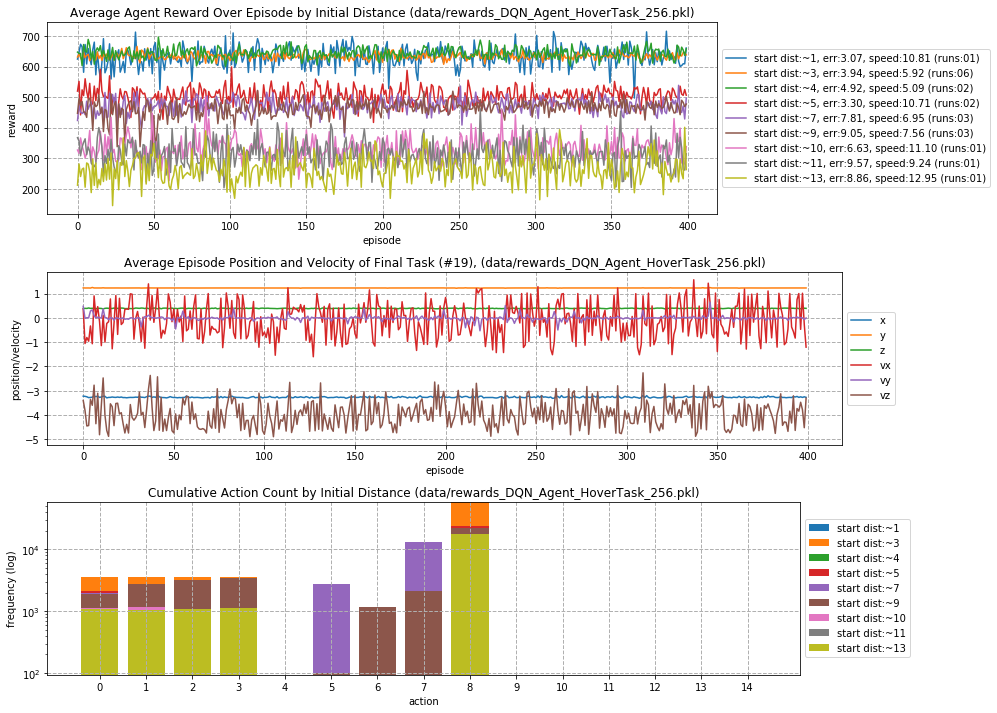

In [415]:
import matplotlib.pylab as plt

def plot_tasks(df_rewards, name_tasks="(default)", path_save=None):
    fig, ax = plt.subplots(nrows = 3, ncols = 1, sharex=False, figsize=(15, 12))

    if type(df_rewards) == list:
        df_rewards = pd.DataFrame(list_tasks)
        
    print("Unique Distance Bins: {:}, {:}".format(df_rewards["bin"].unique(), name_tasks))
    # print(df_rewards)

    # multiline plot with group by
    range_eps = range(0, num_episodes)
    for key, grp in df_rewards.groupby(['bin']):
        label = "start dist:~{:}, err:{:0.2f}, speed:{:0.2f} (runs:{:02d})".format(
            round(key), grp["error_pos"].mean(), grp["error_speed"].mean(), len(grp))
        list_rewards = []
        for ii in range(len(grp)):
            list_rewards.append(grp.iloc[ii]["reward"])
        ax[0].plot(range_eps, np.mean(list_rewards, axis=0), label = label)

    # Shrink current axis by 20%
    # ax[0].set_yscale('log')
    # ax[0].set_ylim([-200,50])
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].set_title('Average Agent Reward Over Episode by Initial Distance ({:})'.format(name_tasks))
    ax[0].set_xlabel('episode')
    ax[0].set_ylabel('reward')
    ax[0].grid(which='major', linestyle='--', linewidth=1)
    # ax[0].autoscale(enable=True, axis='y', tight=True)
    # Put a legend to the right of the current axis
    ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # plot the position + velocity graph
    target_task = len(df_rewards)-1
    label_set = ['x', 'y', 'z', 'vx', 'vy', 'vz']
    for dim_i in range(3):
        ax[1].plot(range_eps, df_rewards.iloc[target_task]["position"][:, dim_i], label=label_set[dim_i])
    for dim_i in range(3):
        ax[1].plot(range_eps, df_rewards.iloc[target_task]["velocity"][:, dim_i], label=label_set[dim_i+3])
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.95, box.height * 0.9])
    ax[1].set_title('Average Episode Position and Velocity of Final Task (#{:}), ({:})'.format(target_task, name_tasks))
    ax[1].set_xlabel('episode')
    ax[1].set_ylabel('position/velocity')
    ax[1].grid(which='major', linestyle='--', linewidth=1)
    ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # plot the an action histogram 
    x_tick = df_rewards.iloc[target_task]["actions"][1][:-1]  # equal for all
    for key, grp in df_rewards.groupby(['bin']):
        label = "start dist:~{:}".format(round(key))
        list_acts = []
        for ii in range(len(grp)):
            list_acts.append(grp.iloc[ii]["actions"][0])
        ax[2].bar(x_tick, np.sum(list_acts, axis=0), label = label)
    ax[2].set_xticklabels(x_tick, minor=False)
    ax[2].set_xticks(x_tick, minor=False)
    ax[2].set_yscale('log')
    box = ax[2].get_position()
    ax[2].set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
    ax[2].autoscale(enable=True, axis='y', tight=True)
    ax[2].set_xlabel('action')
    ax[2].set_ylabel('frequency (log)')
    ax[2].set_title('Cumulative Action Count by Initial Distance ({:})'.format(name_tasks))
    ax[2].grid(which='major', linestyle='--', linewidth=1)
    ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    if path_save is None:
        plt.show()
    else:
        fig.savefig(path_save)
    return fig

if True:
    plot_tasks(df_rewards, name_tasks=path_save)
else:
    from glob import glob
    from os import path
    for path_rewards in glob("data/*.pkl"):
        df = pd.read_pickle(path_rewards)
        name_reward = path.split(path_rewards)[-1]
        path_save = path.join('plots', name_reward.replace(".pkl", ".jpg"))
        fig = plot_tasks(df, name_reward, path_save)


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I created two tasks to evaluate in this project: hovering and a more stringent landing task.  The parent/primary task class was modified to store (and report) values for the best final position, velocity, and disstance from initial starting point.  This was added for a human-check on whether or not the drone was coming in too quickly (or had an easier starting point).  These statistics also help in the plotting stage for understanding of what is happening during optimization.

### Task Formulation

Additionally, the reward function values were boosted start from a high reward value (e.g. 1000) that was decremented by errors in position and velocity.

* **Task** - The original reward function was modified to include a slight penalty for non-zero euler angles.  While this doesn't fully simulate a perfect orientation of the drone, it gets closer to keeping rotors and expected top and bottom in the right position.

* **HoverTask** - The hover task is derived from **Task** and can randomize the starting position and velocities, but attempts to hover at $(x=2, y=2, z=2)$. The reward adds another penalty (double that of positional error) for too much velocity in any direction over a provided maximum.  However, the additional penalty for a high velocity is doubel that of the position error because we want our drone to hover gently, not come in with erratic velocities!  One other addition is a ceiling for velocity tolerance such that values within that ceiling will be set to zero for penalty computations.

* **LandingTask** - The landing task is derived from **HoverTask**, but it specifies the final position as $(x=0, y=0, z=0)$ and has a lower ceiling for velocities errors (to simulate a smooth landing).  The rewards were not modified beyond the hover task configuration.



### Reward Revision

Two main changes were made to the rewards structure during implementation.

* **Crash** - Due to the indiscriminate nature of the physics sim determining if the episode ended because of a crash or because of a time-out.  Some early agent behaviors would simply turn off rotors and end the task quickly by crashing into the ground (for the Landing task).   I attempted to utilize a crash penalty that would zero out the reward for the entirie episode.  Unfortunately, this led to agents acting erractically because some would not realize that the final state was an aggregious error. In the case where rewards were not discounted (also another testing permutation), the agents just disregarded the final crash as a "don't care" action and it didn't impact scores enough.  For this submission, the zero crash reward was disabled because it did not effectively enhance agent training.  This is definitely a **TODO** item because even in the Hover task (where the agent should not touch the ground) many of the end states indicated that it crashed instead of properly hovering.
   * The figure below demonstrates landing and hover task performance for the simplest policy search agent.  Its method simply added noise to a mapping function with little sensitivity to the value function.
   * In the final (should be "best-trained" instance) depicted in the middle graph, the final velocity _vz_ is negative, meaning that the agent was in near free-fall when the episode ended.  This crash effect could not be effectively penalized, as described above.
   * The different actions chosen were quite diverse, but appeared almost random.  Longer distance runs utilized (teal in *hover*, pick in *landing*) exhibited more overall actions -- likely because the agent had further to fly to the target. Agents in both tasks used a both single-rotor (e.g. 0, 1, 2, 4, 8) and multiple-rotor (e.g. 3, 7, 14) control actions indiscriminantly. 

<table>
    <tbody><tr>
        <td width='50%'>
            <a href='plots/rewards_PolicySearch_Agent_HoverTask.jpg' title='Policy Search - Hover' target='_new'>
                <img src='plots/rewards_PolicySearch_Agent_HoverTask.jpg' alt='Policy Search - Hover' width='100%' />
                <p>Policy Search - Hover</p>
            </a>
        </td>
        <td width='50%'>
            <a href='plots/rewards_PolicySearch_Agent_LandingTask.jpg' title='Policy Search - Landing' target='_new'>
                <img src='plots/rewards_PolicySearch_Agent_LandingTask.jpg' alt='Policy Search - Landing' width='100%' />
                <p>Policy Search - Landing</p>
            </a>
        </td>
    </tr>
    </tbody>
</table>



* **Distance Impact** - To magnify the impact of a low-accuracy landing, the distance metric (used for position and velocity differences between respective targets) was modified to be euclidean (L2).  The previous Manhattan (L1) distance was not sufficiently penalizing agents when they went far off-course for a landing or hover task.  This change helped to encourage some _x_ and _y_ normalization, but as indicated by position graphs, it was seldom enough to override the spotted crash behavior.

### Task Testing

In hopes of improving the fitness of each agent, the tasks were run with multiple initializations and multiple episodes.  Specifically, the hover and landing tasks were randomly initialized with a new distance away from a fixed target position (typically 20 tasks) *and* they were iterated with several episodes (typically 400).  The performance graphs are plotted with this in mind to demonstrate general fitness for different task configurations, no over-fitting to a single initialization point.


###### **Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:


### Learning Algorithms

The learning algorithms attempted were a policy learner  **PolicySearch_Agent** (simple Markov differences, **policy_search.py**), a neural-network policy learner **PolicyNN_Agent** (using log prob corrections for an action, **policy_dnn.py**) and a DeepQ NN **QNetwork** (pick actions specific to state, **dqn_torch.py**).  Of these methods, the DeepQ agent performed the best, but its rewards graphs still did not indicate great convergence over multiple episodes and tasks.

<table>
    <tbody><tr>
        <td width='50%'>
            <a href='plots/rewards_DQN_Agent_LandingTask.jpg' title='DeepQNN - Landing' target='_new'>
                <img src='plots/rewards_DQN_Agent_LandingTask.jpg' alt='DeepQNN - Landing' width='100%' />
                <p>DeepQNN - Landing</p>
            </a>
        </td>
        <td width='50%'>
            <a href='plots/rewards_PolicyNN_Agent_LandingTask.jpg' title='PolicyNN_Agent - Landing' target='_new'>
                <img src='plots/rewards_PolicyNN_Agent_LandingTask.jpg' alt='PolicyNN_Agent - Landing' width='100%' />
                <p>PolicyNN_Agent - Landing</p>
            </a>
        </td>
    </tr>
    </tbody>
</table>

The figure above plots DeepQNN and PolicyNN performances, neither of which regularly landed at target position of _(0, 0, 0)_ -- as indicated by the final position (middle graph). By the quick episodic convergence of the PolicyNN (the top graph), we can see that ignoring the input state is clearly a loosing strategy.  This agent optimized only on the reward, so it converged on a local minimum at the wrong value. 

### Hyperparameters

Disappointingly, the effect of varying $\gamma$ was minmal.  Varying of $\epsilon$ created earlier convergence (smaller overall episode counts), but did not improve the reward performance.  This finding is unusual, but I tend to attribute it to poor task reward formulation.  As discussed below (action configuration), there were some challenges in specifying the right way to express the actions of the agents.  In the end, all of the agent methods underperformed my expectations for seeing improvements over larger training sessions.


### DNN Architectures

As discussed above, there were two NNs evaluated across agents.  In both of these configurations, the size of the hiden layers was relatively small (64) and did not show vast improvements with larger settings.  The number of layers was similarly kept small after experiments at only 2 (_PolicyNN__Agent_) or 3 (_QNetwork_).  While the execution time went up, the agents were still making typical poor choices: crashing into the ground as a means for ending an episode and being highly off target w.r.t. _x_ or _y_ coordinates.  Similarly, the activation (ReLU or leaky ReLU) function seemed suitable for the actions, so variations were not kept in the final versions.

<table>
    <tbody><tr>
        <td width='50%'>
            <a href='plots/rewards_DQN_Agent_HoverTask.jpg' title='DQN Hover @ 64 nodes' target='_new'>
                <img src='plots/rewards_DQN_Agent_HoverTask.jpg' alt='DQN Hover @ 64 nodes' width='100%' />
                <p>DQN Hover @ 64 Nodes</p>
            </a>
        </td>
        <td width='50%'>
            <a href='plots/rewards_DQN_Agent_HoverTask_256.jpg' title='DQN Hover @ 256 nodes' target='_new'>
                <img src='plots/rewards_DQN_Agent_HoverTask_256.jpg' alt='DQN Hover @ 256 nodes' width='100%' />
                <p>DQN Hover @ 64 Nodes</p>
            </a>
        </td>
    </tr>
    </tbody>
</table>

The figure above demonstrates performance for DQN with three layers.  Hidden layers have 64 and 256 nodes respectively.  Rewards convergence was not significant nor was the choice of different actions.

* The smaller network had a harder time keeping steady rewards (there is much greater variance across episodes), as seen in the top plot.
* Both networks seem to lock onto movement of only one or two dimensions and ignore the last; the 64 didn't move _x_ and the 256 network didn't move _y_. With a target position of _(2, 2, 2)_, neither network appears close to this point at the end of its best trained instance, as seen in the middle plot.
* Where it's not expected to have equal distribution across rotors, the third graph indicates that the agents can get stuck in a few favorable states. For rotor control, the 256 network appeared to prefer operationg rotors 1, 2, 3 (bin 0-3, bin 5-7) together and rotor 4 alone (bin 4 or bin 8).  The 64 network appeared to have more diversity in bin selection, although it did not give equal usage across all actions either.
      

### Agent Action Configurations

Action expression for an agent was an interesting experiment.  In the final configuration, an action included on/off states for all four rotors for each action and step.  This decision made expression of the action simple and the action space much smaller.  The agent kept an internal rotor speed to send to the simulator/task that was changed minutely with each rotor's on/off decision (see "Combined Model, On/Off Values" below).

Finally, as the responsiveness of each action (different values, different rotors) was increased, the previous task's definition of repeat actions (e.g. repeating each action $3$ times without peforming a step/action call on the agent) was eliminated.  Although not quantified explicitly, this appeared to let different actions be chosen more frequently.


**Detailed Action Experiments**

The path to this final state was a painful one, as many choices were attempted along the way!  One inconsistency with the initial policy learner was that it generated a probability configuration that allowed positive or negative values.  

_Single Model_

* **Attempt 1** - First, trying to reduce the learning burden for an agent, the thought was to use a single model for all action selection regardless of the rotor.  To keep differentiation between the rotor prediction, the input state was augmented with a single dimension having ordinal value of the actor (rotor).  Here, both the _action_ and _step_ functions would actually cascade the call to evaluate an action on the single model and then assemble the final output.  The size of a possible action (for the individual model) was derived from a pre-determine value size and exponential expansion.  For example, if there were $5$ possible values and a range of $0-900$ to be sent to the rotor, the action values would be computed as below to give $[ 900.0, 186.92, 38.82, 8.06, 0 ]$.
   * Compute the total range of values
   * Derive an exponential space for that value range
   * Append a zero (non-action) state for that value
```
(from policy_dnn_v2_multiaction.py)
        # list(np.logspace(np.log(1), -np.log(900), num=4, base=2, endpoint=True) * 900) + [0]
        
        val_range = val_max - val_min
        self.action_scalars = np.logspace(np.log(1), -np.log(val_range), 
                                      num=action_steps-1, base=2, endpoint=True) * val_range
        self.action_scalars = list(self.action_scalars) + [0]
```
* **Result 1** - A bad steady state was learned where the actions were either all on or all off (for all rotors), leading to erractic behavior.  Essentially, the extra dimension in the state expression was ignored by all agents.

_Combined Model, Exact Values_
* **Attempt 2** - Second, trying to bring cohesion to the different rotors, the action values for each rotor were moved into a single action expression.  Specifically, using a similar computation above, a maximum of $4$ values were included and replicated for the $4$ rotors.  This was allowed the action too be encoded as a simple integer that would be binary-expanded to map each of the sub-value ranges.
   * For each of the rotors, $4$ values were allowed for an action: $ v_r = [ v_{r,1}, ..., v_{r,4}] $ or $ [900.0, 85.18, 8.06, 0]$
   * Each of these values is mutually exclusive, so values $0...3$ could represent them (as a _nibble_, $v_r$).
   * A _nibble_ for each rotor was packed into a single action via binary encoding: $ a = v_1 + (v_2 << 4) + (v_3 << 8) + (v_4 << 16) $ for a total of $64$ different actions.
* **Result 2** - While the agents did add some diversity to their action choice, the overall space was sparsely selected. The state space lost it rotor indicator (a single feature), but the frequency of minute movments across different rotor values was small and in some agent models (like _PolicyNN__Agent_) the probability was dominated by just a few actions.  As a side observation, it seemed unrealistic to allow a rotor value to quickly jump from $0$ to $900$ -- which was a possible action choice -- so, this configuration seemed a little unusual as well.

_Combined Model, On/Off Values_
* **Attepmt 3** - Moving forward from the single model configuration above, a final action state that used simple on/off states for each rotor was chosen.  This reduced the total number of actions to only $16$ as $pow(2,4) = 16$.  Now, when an action for each rotor was value mapped it would simply be $[0, 1, 0, 1]$, which would indicate "speed increase" for rotors $2$ and $4$.  With actions configured this way, the agent was modified to have a step-wise knowledge of the last rotor speed and simply move that speed up or down depending on the binary state of each rotor.  To improve the final conherence with the new agent's internal rotor speed, these features were also added to the state ($4$ additional values).
   * Compute binary mapping for an action to each rotor "speed increase" action
   * On _action_ compute, increase the change expressed by the action to the agent's prior speed
   * On _step_ compute, apply the new action to the prior speed, but send the decoded action (the single integer value) back to the agent for learning
   * Before learning was executed, include the previous rotor speeds as part of the agent's input state
```
(from policy_search.py)
    # foward map (to act)
    act_gate = np.unpackbits(np.array([[act_input]], dtype=np.uint8)).astype(float)[-self.action_size:]
    nd_new_values = self.action_values + act_gate*self.action_delta - self.action_delta*0.5
    ...
    
    # reverse map (to learn in step)
    nd_new_values = act_input - self.action_values + self.action_delta*0.5
    nd_new_values /= self.action_delta
    nd_new_values = (8-self.action_size)*[0] + list(nd_new_values.astype(int))
    nd_new_values = np.packbits(nd_new_values)
```
* **Result 3** - This method seemed to allow for the most diversity in action selection (indicated by more dense action histogram) and was a more natural (physically possible) action to send to a drone.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

### Project Challenges

As documented above, there were several challenges in this problem, but they were an opportunity to experience a complex problem.  The "most" challenging issues consisted of: action configuration (multiple rotors as independent actors with independent values) and state representation (including rotor speed or other world knowledge).

* The visualization of each agent's state was often too complex to determine valuable learning or activity choices.     
* If poor action choices were made during an episode, did this mean that the agent was learning poorly or that the specific episode was an exploration of a bad state?
* Should reward values experience heavy penalties when a clearly bad baheavior was discovered?
* How can we modify learning parameters to occasionally try the "unexpected" action, particularly when probabilistic models minimize the likelihood of that action choice?  This was more important when the agent was exposed to new (semi-randomized) tasks after overfitting to a single task from too many episodes.


### Behavioral Observations

Most behavioral observations have been documented in sections above.  The main two problems with in this project have been around a lack of diversity of input (agent gets stuck on one action even in the face of poor performance) and the inability to detect crash/failure conditions as the episode ending cause.

